# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import srex_new
import operator
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one
newStopWords = get_stop_words('en') # a big one
stop_words_list.extend(newStopWords) # all together

In [3]:
query                    = 'internet of things'
reference_terms          = ['iot', 'internet of things']
nr_search_results        = 10

ranking_weight_type      = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance           = 4 
sumarize                 = 'none' 
include_reference_term   = False
nr_of_graph_terms        = 5
format_adjacent_refterms = True


In [4]:
# Articulo de revista científica IEEE Explore
#doc = srex_new.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex_new.get_ieee_explore_ranking(query, nr_search_results)
#results

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex_new.get_ieee_explore_ranking("search engine", 10)

In [5]:
list_of_documents = srex_new.get_ranking_as_weighted_documents(results, ranking_weight_type)
#list_of_documents

In [6]:
sentences_list = srex_new.get_sentences_list_from_documents(list_of_documents)
#sentences_list

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [7]:
processed_sentences_list = srex_new.do_text_transformations_by_document(sentences_list, stop_words_list, lema=True, stem=False)
reference_terms = srex_new.do_text_transformations_by_string_in_list(reference_terms, stop_words_list, lema=True, stem=False)

#processed_sentences_list
#reference_terms

## Delete sentences that do not contain a reference term

In [8]:
processed_sentences_list_with_refterms = srex_new.delete_sentences_without_refterms(processed_sentences_list, reference_terms)
#processed_sentences_list_with_refterms

## Calculate word positions

In [9]:
doc_pos_matrix = srex_new.get_documents_positions_matrix(processed_sentences_list)
#doc_pos_matrix
#len(doc_pos_matrix)

## Calculate vecinity matrix

In [10]:
vecinity_matrix = srex_new.get_vecinity_matrix(doc_pos_matrix, reference_terms, limit_distance, include_reference_term, format_adjacent_refterms)
#vecinity_matrix
#len(vecinity_matrix)

In [11]:
unique_vecinity_list_by_doc = srex_new.get_unique_vecinity_dict_by_document(vecinity_matrix, limit_distance)
unique_vecinity_list_by_doc

[{'text': {'device': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
   'data': {'internet': [0, 0, 0, 1]},
   'method': {'internet': [0, 0, 0, 1], 'thing': [0, 0, 1, 0]},
   'multilayered': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
   'host': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
   'connected': {'internet': [1, 0, 0, 0], 'thing': [0, 1, 0, 0]},
   'security': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
   'network': {'thing': [0, 0, 0, 1]},
   'transport': {'internet': [0, 0, 1, 0], 'thing': [0, 0, 0, 1]},
   'end': {'thing': [0, 0, 0, 1]},
   'cellular': {'internet': [0, 1, 0, 1], 'thing': [0, 0, 2, 0]}},
  'weight': 1.0},
 {'text': {'introduce': {'iot': [0, 0, 0, 1]},
   'assiut': {'iot': [2, 0, 0, 0]},
   'accessible': {'thing': [0, 0, 1, 0],
    'internet': [0, 1, 0, 0],
    'iot': [0, 2, 1, 0]},
   'architecture': {'iot': [0, 1, 0, 0]},
   'application': {'iot': [2, 0, 0, 0]},
   'implement': {'iot': [0, 0, 1, 0]},
   'testbed': {'thing': [0, 1, 0

In [12]:
terms_freq_list = srex_new.get_terms_frequency_list(unique_vecinity_list_by_doc)
#terms_freq_list

In [13]:
# Aplicar la función a cada diccionario en la lista
first_sorted_terms_freq_list = srex_new.get_first_sorted_terms_frequency_list(terms_freq_list, nr_of_graph_terms)
first_sorted_terms_freq_list

[{'cellular': 4, 'device': 2, 'method': 2, 'multilayered': 2, 'host': 2},
 {'remotely': 6, 'accessible': 5, 'testbed': 5, 'assiut': 2, 'application': 2},
 {'blockchain': 4, 'widespread': 3, 'smart': 3, 'city': 3, 'application': 3},
 {'environment': 2, 'automation': 2, 'smart': 2, 'lab': 1},
 {'employed': 3, 'widely': 3, 'nowadays': 3, 'wireless': 2, 'different': 2},
 {'connection': 6, 'artificial': 2, 'shift': 2, 'alleviated': 2, 'effect': 2},
 {'driving': 3, 'next': 3, 'wave': 2, 'revolution': 2, 'business': 2},
 {'future': 5, 'dense': 3, 'open': 3, 'potential': 3, 'cyberphysical': 2},
 {'network': 4, 'device': 3, 'online': 3, 'participate': 3, 'intrusion': 3},
 {'security': 8, 'issue': 4, 'device': 4, 'extreme': 3, 'identified': 3}]

In [14]:
most_freq_distance_list = srex_new.get_most_frequency_distance_list(first_sorted_terms_freq_list, unique_vecinity_list_by_doc, reference_terms[0], limit_distance)
most_freq_distance_list

[{'cellular': {'frequency': 4, 'distance': 2.5},
  'device': {'frequency': 2, 'distance': 2.5},
  'method': {'frequency': 2, 'distance': 2.5},
  'multilayered': {'frequency': 2, 'distance': 2.5},
  'host': {'frequency': 2, 'distance': 2.5}},
 {'remotely': {'frequency': 6, 'distance': 2.5},
  'accessible': {'frequency': 5, 'distance': 2.3333333333333335},
  'testbed': {'frequency': 5, 'distance': 2.6666666666666665},
  'assiut': {'frequency': 2, 'distance': 1.0},
  'application': {'frequency': 2, 'distance': 1.0}},
 {'blockchain': {'frequency': 4, 'distance': 2.5},
  'widespread': {'frequency': 3, 'distance': 4.0},
  'smart': {'frequency': 3, 'distance': 1.0},
  'city': {'frequency': 3, 'distance': 2.0},
  'application': {'frequency': 3, 'distance': 3.0}},
 {'environment': {'frequency': 2, 'distance': 2.5},
  'automation': {'frequency': 2, 'distance': 2.5},
  'smart': {'frequency': 2, 'distance': 2.5},
  'lab': {'frequency': 1, 'distance': 2.5}},
 {'employed': {'frequency': 3, 'distance

In [15]:
doc_index = 9
graph = srex_new.getGraphViz(reference_terms[0], most_freq_distance_list[doc_index], '0.7', 'deepskyblue')

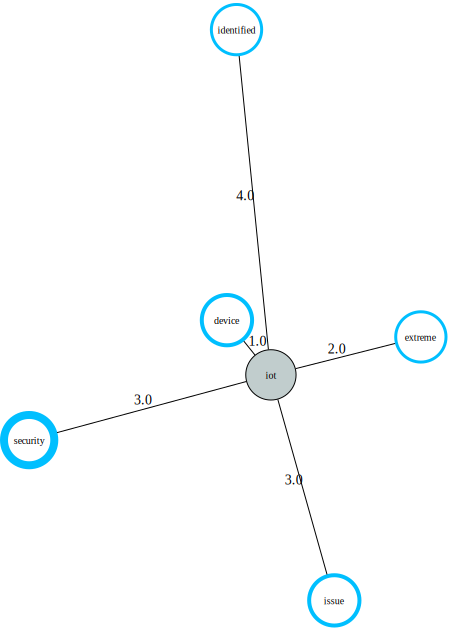

In [16]:
graph